In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [3]:
# Define image size and batch size
img_width, img_height = 128, 128
batch_size = 32

train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/test'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescale for validation
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1080 images belonging to 8 classes.
Found 120 images belonging to 8 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])


C:\Users\ELITEBOOK FOLIO 9470\anaconda2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/20


C:\Users\ELITEBOOK FOLIO 9470\anaconda2\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.1648 - loss: 2.1362 - val_accuracy: 0.1667 - val_loss: 2.0999
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3750 - loss: 1.7644 - val_accuracy: 0.3750 - val_loss: 1.8724
Epoch 3/20


C:\Users\ELITEBOOK FOLIO 9470\anaconda2\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


33/33 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.3637 - loss: 1.6873 - val_accuracy: 0.3229 - val_loss: 1.7475
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3750 - loss: 1.6721 - val_accuracy: 0.2917 - val_loss: 1.8739
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.5008 - loss: 1.4430 - val_accuracy: 0.5104 - val_loss: 1.1650
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5833 - loss: 1.1042 - val_accuracy: 0.5000 - val_loss: 0.9181
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.6287 - loss: 1.0202 - val_accuracy: 0.6771 - val_loss: 0.7634
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6250 - loss: 0.9907 - val_accuracy: 0.7500 - val_loss: 0.7526
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7276 - loss: 0.8005 - val_accuracy: 0.8229 - val_loss: 0.4997
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8125 - loss: 0.4551 - val_accuracy: 0.7500 - val_loss: 0.4506
E

In [9]:
model.save('currency_classifier_model.h5')


In [10]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 950ms/step - accuracy: 0.9881 - loss: 0.0842
Validation loss: 0.08822041004896164
Validation accuracy: 0.9833333492279053


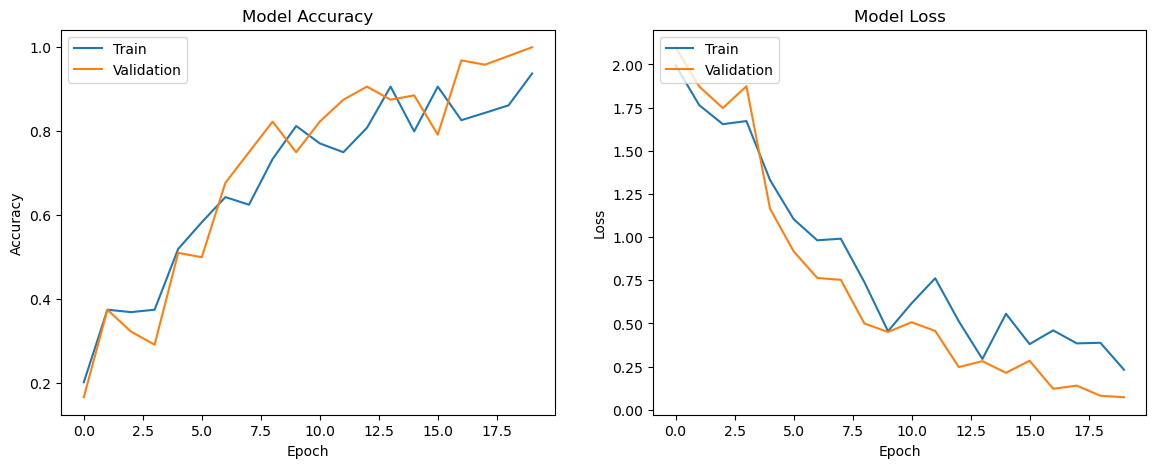

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

